In [ ]:
#3

In [25]:
import os
import glob
import math
import numpy as np

# Folder Path
path = r"C:\Users\Patron\Desktop\languageID"
languages = ['e', 'j', 's']

In [26]:
# Read text File
  
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        contents = f.read()
    return contents

In [27]:
# iterate through all training files
global_count_dict = {'e':{}, 'j':{}, 's': {}}

for language in languages:
    dict = {}
    for file in glob.glob(f"{path}/{language}[0-9].txt"):
        if file.endswith(".txt"):
            file_path = f"{file}"
            contents = read_text_file(file_path)
        for char in contents:
            if char == "\n":
                continue
            else:
                if dict.get(char) == None:
                    dict[char] = 1
                else:
                    dict[char] = dict[char] + 1   
    global_count_dict[language] = dict

In [28]:
global_ccp = {'e':{}, 'j':{}, 's': {}}
for language in languages:
    ccp = {}
    total = 0
    for char in sorted(global_count_dict[language].keys()):
        total = total + global_count_dict[language][char]
    for char in sorted(global_count_dict[language].keys()):
        if ccp.get(char) == None:
            ccp[char] =  float(global_count_dict[language][char] + 0.5)/ (total + (27 * 0.5))
    global_ccp[language] = ccp
    print(f"For language : {language}, the CCP vector is {ccp}\n")

For language : e, the CCP vector is {' ': 0.1792499586981662, 'a': 0.0601685114819098, 'b': 0.011134974392863043, 'c': 0.021509995043779945, 'd': 0.021972575582355856, 'e': 0.1053692383941847, 'f': 0.018932760614571286, 'g': 0.017478936064761277, 'h': 0.047216256401784236, 'i': 0.055410540227986124, 'j': 0.001420783082768875, 'k': 0.0037336857756484387, 'l': 0.028977366595076822, 'm': 0.020518751032545846, 'n': 0.057921691723112505, 'o': 0.06446390219725756, 'p': 0.01675202378985627, 'q': 0.0005617049396993227, 'r': 0.053824549810011564, 's': 0.06618205848339666, 't': 0.08012555757475633, 'u': 0.026664463902197257, 'v': 0.009284652238559392, 'w': 0.015496448042293078, 'x': 0.001156451346439782, 'y': 0.013844374690236246, 'z': 0.0006277878737815959}

For language : j, the CCP vector is {' ': 0.12344945665466997, 'a': 0.1317656102589189, 'b': 0.010866906600510151, 'c': 0.005485866033054963, 'd': 0.01722631818022992, 'e': 0.06020475907613823, 'f': 0.003878542227191726, 'g': 0.014011670568

In [29]:
"""
Part 3.4 -- Representing X from e10.txt as a bag-of-words vector
"""
test_file = f"{path}/e10.txt"

def predict(test_file):
    x_vector = {}
    for char in read_text_file(test_file):
        if char == "\n":
            continue
        else:
            if x_vector.get(char) == None:
                x_vector[char] = 1
            else:
                x_vector[char] = x_vector[char] + 1   

    # Printing the required bag of characters vector X
    print(sorted(x_vector.items()))

    # Printing Log-Likelihood for English, Japanese and Spanish respectively
    log_likelihood =  {'e': float(0), 'j': float(0), 's': float(0)}
    for language in languages:
        ccp = global_ccp[language]
        logsum = 0
        for char in x_vector:
            if ccp.get(char) == None:
                ccp[char] = 0.5 / 27*0.5
            logsum = logsum + math.log(ccp[char]) * x_vector[char]
        print(f"Log-Likelihood for language {language} is {logsum}")
        log_likelihood[language] = logsum

    prior = float((10 + 0.5)) / (30 + 3*0.5)

    # Calculate posterior using Bayes rule
    posterior = [log_likelihood[i] * prior for i in log_likelihood]
    print(posterior)

    # Estimate the prediciton based on max. value of posterior probability
    prediction = posterior.index(max(posterior))

    print(prediction)
    return languages[prediction]

In [30]:
"""
Part 3.5 -- Calculating likelihood of X for each given class under multinomial model assumption (Is a part of the pipeline of Part 4.6)
"""

"""
Part 3.6 -- Printing the posterior probabilities and prediction for our single test vector X.
"""
predict(f"{path}/e10.txt")


[(' ', 498), ('a', 164), ('b', 32), ('c', 53), ('d', 57), ('e', 311), ('f', 55), ('g', 51), ('h', 140), ('i', 140), ('j', 3), ('k', 6), ('l', 85), ('m', 64), ('n', 139), ('o', 182), ('p', 53), ('q', 3), ('r', 141), ('s', 186), ('t', 225), ('u', 65), ('v', 31), ('w', 47), ('x', 4), ('y', 38), ('z', 2)]
Log-Likelihood for language e is -7841.865447060635
Log-Likelihood for language j is -8749.114299535931
Log-Likelihood for language s is -8467.28204401056
[-2613.9551490202116, -2916.3714331786437, -2822.42734800352]
0


'e'

In [16]:
"""
Part 3.7 -- Predicting the posterior probabilities and prediction for the entire test suite as described.
"""
for language in languages:
    dict = {}
    for file in glob.glob(f"{path}/{language}[1-9][0-9].txt"):
        if file.endswith(".txt"):
            file_path = f"{file}"
            print(f"Actual:  {language}")
            print(f"Prediction: {predict(file_path)}")

Actual:  e
Prediction: e
Actual:  e
Prediction: e
Actual:  e
Prediction: e
Actual:  e
Prediction: e
Actual:  e
Prediction: e
Actual:  e
Prediction: e
Actual:  e
Prediction: e
Actual:  e
Prediction: e
Actual:  e
Prediction: e
Actual:  e
Prediction: e
Actual:  j
Prediction: j
Actual:  j
Prediction: j
Actual:  j
Prediction: j
Actual:  j
Prediction: j
Actual:  j
Prediction: j
Actual:  j
Prediction: j
Actual:  j
Prediction: j
Actual:  j
Prediction: j
Actual:  j
Prediction: j
Actual:  j
Prediction: j
Actual:  s
Prediction: s
Actual:  s
Prediction: s
Actual:  s
Prediction: s
Actual:  s
Prediction: s
Actual:  s
Prediction: s
Actual:  s
Prediction: s
Actual:  s
Prediction: s
Actual:  s
Prediction: s
Actual:  s
Prediction: s
Actual:  s
Prediction: s


In [ ]:
#4

100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 33451617.88it/s]


Extracting ./dataset/MNIST/MNIST\raw\train-images-idx3-ubyte.gz to ./dataset/MNIST/MNIST\raw



100%|████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<?, ?it/s]


Extracting ./dataset/MNIST/MNIST\raw\train-labels-idx1-ubyte.gz to ./dataset/MNIST/MNIST\raw



100%|██████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 21938008.60it/s]


Extracting ./dataset/MNIST/MNIST\raw\t10k-images-idx3-ubyte.gz to ./dataset/MNIST/MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./dataset/MNIST/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/MNIST\raw

Epoch: 1, Time Spent: 11.42s, Accuracy: 73.20%, Loss: 0.90
Epoch: 2, Time Spent: 23.51s, Accuracy: 80.26%, Loss: 0.66
Epoch: 3, Time Spent: 35.36s, Accuracy: 82.97%, Loss: 0.56
Epoch: 4, Time Spent: 47.61s, Accuracy: 84.73%, Loss: 0.50
Epoch: 5, Time Spent: 59.59s, Accuracy: 86.27%, Loss: 0.46
Epoch: 6, Time Spent: 71.96s, Accuracy: 87.11%, Loss: 0.44
Epoch: 7, Time Spent: 84.13s, Accuracy: 87.84%, Loss: 0.41
Epoch: 8, Time Spent: 95.27s, Accuracy: 88.52%, Loss: 0.40
Epoch: 9, Time Spent: 107.51s, Accuracy: 88.93%, Loss: 0.38
Epoch: 10, Time Spent: 118.86s, Accuracy: 89.45%, Loss: 0.37
Epoch: 11, Time Spent: 130.49s, Accuracy: 89.60%, Loss: 0.36
Epoch: 12, Time Spent: 142.10s, Accuracy: 89.61%, Loss: 0.35
Epoch: 13, Time Spent: 153.97s, Accuracy: 90.03%, Loss: 0.34
Epoch: 14, Time Spent: 165.34s, Accuracy: 90.28%, Loss: 0.33
Epoch: 15, Time Spent: 176.77s, Accuracy: 90.54%, Loss: 0.32
Epoch: 16

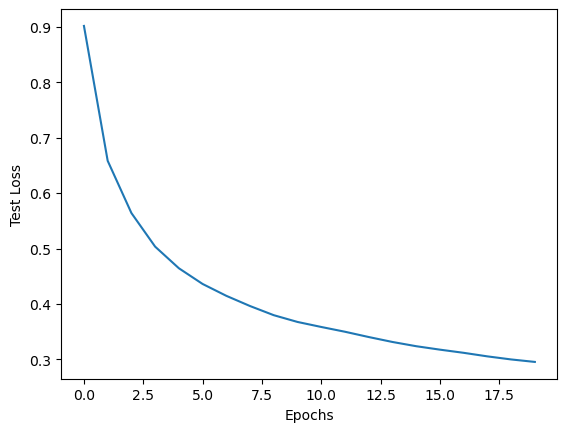

In [19]:
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch
import time

# Transformations to normalize the PIL image
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Layer details for the neural network
input_size = 784
hidden_layer_size = 300
output_size = 10

losses = []
accuracies = []

class NeuralModel():
    """
    A class representing a simple 2-layer network, with SGD as an optimizer.
    """

    def __init__(self, sizes, epochs=20, l_rate=0.01):
        self.sizes = sizes
        self.epochs = epochs
        self.l_rate = l_rate
        self.init_params()
        
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def softmax(self, x):
        exps = np.exp(x)
        denom = np.sum(exps, axis=1)
        denom.resize(exps.shape[0], 1)
        return exps / denom
        
    def init_params(self):
        input_layer = int(self.sizes[0])
        hidden_1 = int(self.sizes[1])
        output_layer = int(self.sizes[2])

        # Random initialization of weights between -1 and 1
        self.w1 = np.random.uniform(low=-1, high=1, size=(input_layer, hidden_1))
        self.w2 = np.random.uniform(low=-1, high=1, size=(hidden_1, output_layer))

        # Random initialization of weights from normal distribution
        #self.w1 = np.random.randn(input_layer, hidden_1)
        #self.w2 = np.random.randn(hidden_1, output_layer)

        # Zero initialization of weights
        #self.w1 = np.zeros((input_layer, hidden_1))
        #self.w2 = np.zeros((hidden_1, output_layer))
        
    def forward(self, inputs):
        # Input layer to hidden linear layer
        inputs = inputs.numpy()
        self.linear_1 = inputs.dot(self.w1)
        self.out1 = self.sigmoid(self.linear_1)

        # Hidden layer to softmax layer
        self.linear2 = self.out1.dot(self.w2)
        self.out2 = self.softmax(self.linear2)

        return self.out2
        
    def backward(self, x_train, y_train, output):
        """
        This function performs backpropagation by estimating the derivates at each layer and then applying chain rule to propagate it to the first layer.

        Parameters:
        x_train : The input tensor for the minibatch.
        y_train : The tensor containing the expected values for the minibatch.
        output : A numpy array containing the model's predictions for the minibatch

        Returns:
        w1_update : The delta matrix of the same size as W1 containing its derived updates.
        w2_update : The delta matrix of the same size as W2 containing its derived updates. 
        """
        # Convert tensors to numpy arrays
        x_train = x_train.numpy()
        y_train = y_train.numpy()

        batch_size = y_train.shape[0]

        # Derivative of loss 
        d_loss = output - y_train

        # Calculating delta for W2
        change_w2 = (1./batch_size) * np.matmul(self.out1.T, d_loss)

        # Backpropagating to the first layer from the second layer
        d_out_1 = np.matmul(d_loss, self.w2.T)
        d_linear_1 = d_out_1 * self.sigmoid(self.linear_1) * (1 - self.sigmoid(self.linear_1))

        # Calculating delta for W1
        change_w1 = (1. / batch_size) * np.matmul(x_train.T, d_linear_1)

        return change_w1, change_w2
    
    def update_weights(self, w1_update, w2_update):
        """
        This function takes the delta in the respective weight matrices and updates it according to the learning rate.

        Parameters:
        w1_update : The delta matrix of the same size as W1 containing its derived updates.
        w2_update : The delta matrix of the same size as W2 containing its derived updates. 
        """
        self.w1 -= self.l_rate * w1_update
        self.w2 -= self.l_rate * w2_update
    
    def compute_loss(self, y, y_hat):
        """
        This function computes the cross-entropy loss for a given minibatch of predictions.

        Parameters:
        y : The tensor containing the expected values for the minibatch.
        y_hat : The prediction of the model for the minibatch (in terms of softmax probability scores). 

        Returns:
        loss : The mean cross-entropy loss across the minibatch.
        """
        batch_size = y.shape[0]
        y = y.numpy()
        # Computing the cross entropy loss for the model and its given predictions
        loss = np.sum(np.multiply(y, np.log(y_hat)))
        loss = -(1./batch_size) * loss
        return loss
            
    def compute_metrics(self, val_loader):
        """
        Calculates the accuracy and mean loss of the model over the entire test set.

        Parameters:
        val_loader : The torch dataloader referencing the dataset's validation loader.

        Returns:
        (accuracy, loss) : A tuple representing the accuracy and the loss scalar representing the loss averages over all minibatches, respectively.
        """
        losses = []
        correct = 0
        total = 0

        for i, data in enumerate(val_loader):
            x, y = data
            # Converting to expected one-hot format
            y_onehot = torch.zeros(y.shape[0], 10)
            y_onehot[range(y_onehot.shape[0]), y]=1
            # Flattening input image into 1-D
            flattened_input = x.view(-1, 28*28)
            output = self.forward(flattened_input)
            predicted = np.argmax(output, axis=1)
            # Calculating correctly predicted labels
            correct += np.sum((predicted==y.numpy()))
            total += y.shape[0]
            # Computing the cross entropy loss
            loss = self.compute_loss(y_onehot, output)
            losses.append(loss)

        # Performing mean over all minibatches
        return (correct/total), np.mean(np.array(losses))
        
    def train(self, train_loader, val_loader):
        """
        This function trains the neural model over the epochs defined, updating its weights after each minibatch and also computing the test error after each epoch.

        Parameters:
        train_loader : The torch dataloader for the training set.
        val_loader : The torch dataloader for the test set.
        """
        start_time = time.time()
        global losses
        global accuracies
        for iteration in range(self.epochs):
            for i, data in enumerate(train_loader):
                x, y = data
                # Since the model is producing a softmax probability over 10 classes, the label needs to be converted to a one-hot encoded vector
                y_onehot = torch.zeros(y.shape[0], 10)
                y_onehot[range(y_onehot.shape[0]), y]=1
                # Converting 28x28 image into a flattened input
                flattened_input = x.view(-1, 28*28)
                # Forward pass the input through the model
                output = self.forward(flattened_input)
                # Compute gradients for the linear layer weights using SGD
                w1_update, w2_update = self.backward(flattened_input, y_onehot, output)
                # Perform weight update for the minibatch
                self.update_weights(w1_update, w2_update)
            # Compute the mean loss over the test set after the completion of epoch
            accuracy, loss = self.compute_metrics(val_loader)
            losses.append(loss)
            accuracies.append(accuracy)
            print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%, Loss: {3:.2f}'.format(
                iteration+1, time.time() - start_time, accuracy*100, loss
            ))
    
if __name__=='__main__':
    model = NeuralModel(sizes=[784, 300, 10], epochs=20)
    # Download and load the training data using PyTorch's dataloader
    trainset = datasets.MNIST('./dataset/MNIST/', download=True, train=True, transform=transform)
    valset = datasets.MNIST('./dataset/MNIST/', download=True, train=False, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
    valloader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=True)
    # Training the model over the MNIST dataset
    model.train(train_loader=trainloader, val_loader=valloader)
    plt.xlabel('Epochs')
    plt.ylabel('Test Loss')
    plt.plot(losses)
    plt.show()

Sequential(
  (0): Linear(in_features=784, out_features=300, bias=False)
  (1): Sigmoid()
  (2): Linear(in_features=300, out_features=10, bias=False)
  (3): LogSoftmax(dim=1)
)
Epoch 0, Training loss: 1.2549897702534993
Epoch 1, Training loss: 0.5216541725317637
Epoch 2, Training loss: 0.41017101573546727
Epoch 3, Training loss: 0.3655681642929713
Epoch 4, Training loss: 0.3404525827407837
Epoch 5, Training loss: 0.3237267974972725
Epoch 6, Training loss: 0.31075585945447287
Epoch 7, Training loss: 0.30015171048641204
Epoch 8, Training loss: 0.29104676242868105
Epoch 9, Training loss: 0.282658982856075
Epoch 10, Training loss: 0.2748791009247303
Epoch 11, Training loss: 0.2675560789426168
Epoch 12, Training loss: 0.2606118195960919
Epoch 13, Training loss: 0.2537597799340884
Epoch 14, Training loss: 0.24731421189308167
Epoch 15, Training loss: 0.24091945605476697
Epoch 16, Training loss: 0.23475858801603317
Epoch 17, Training loss: 0.22898748188515505
Epoch 18, Training loss: 0.2233120

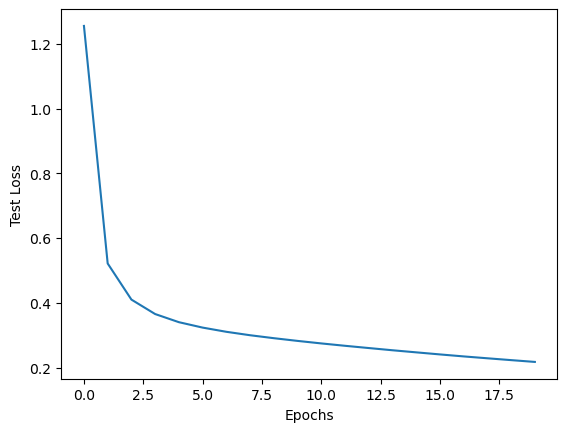

In [20]:
import numpy as np
import time
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn
import torch

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('./dataset/MNIST/', download=True, train=True, transform=transform)
valset = datasets.MNIST('./dataset/MNIST/', download=True, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=True)

# Layer details for the neural network
input_size = 784
hidden_size = 300
output_size = 10

# Build a simple 2-layer feed forward network as described
model = nn.Sequential(nn.Linear(input_size, hidden_size, bias=False),
                      nn.Sigmoid(),
                      nn.Linear(hidden_size, output_size, bias=False),
                      nn.LogSoftmax(dim=1))
print(model)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0)
# Using the cross entropy (or NLL) loss
criterion = nn.NLLLoss()

epochs = 20
losses = []
for i in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        losses.append(float(running_loss/len(train_loader)))
        print("Epoch {0}, Training loss: {1}".format(i, running_loss/len(train_loader)))

correct_count, all_count = 0, 0
for images,labels in val_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 28*28)
    # Turn off gradients for forward pass
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.plot(losses)
plt.show()